In [2]:
import pandas as pd

In [2]:
!grep scaffold_8[[:space:]] coverages/al1_1.depth.bed > al1_1.depth_chr8.tmp.bed

In [3]:
acc_list = ["al1_1", "al3_1", "al4_1"]


In [4]:
with open("acc_list.tmp", "w") as al:
    for i in acc_list:
        al.write(i)
        al.write("\n")
        #!grep scaffold_8[[:space:]] coverages/$i.depth.bed > $i.depth_chr8.tmp.bed

In [5]:
!./scripts/get_chrfromded.sh

In [6]:
cov_pivot = ""
for i in acc_list:
    path = i + ".depth_chr8.tmp.bed"
    acc_bed = pd.read_csv(path, sep="\t", header = None)
    cov = "cov_" + i
    acc_bed = acc_bed.rename(columns={0: "chr", 1: "start", 2: "stop", 3: cov})
    if len(cov_pivot) == 0:
        cov_pivot = acc_bed
    else:
        cov_pivot = cov_pivot.merge(acc_bed.iloc[:, [1, 3]], on="start", how="outer")
#acc_bed.head()

In [7]:
cov_pivot["mean_cov"] = cov_pivot.iloc[:, 3:].mean(axis = 1)

In [21]:
name_list = []
for i in acc_list:
    name = "cov_" + i
    name_list.append(name)

In [26]:
import statistics
cov_pivot["stdev_cov"] = cov_pivot.iloc[:, 3:-1].apply(lambda x: statistics.stdev(x), axis=1)

In [97]:
plotcov = cov_pivot.mean_cov[(cov_pivot.start >= 1064000) & (cov_pivot.start <= 1067000)]
Sigma_new_vec = cov_pivot.stdev_cov[(cov_pivot.start >= 1064000) & (cov_pivot.start <= 1067000)]
x_ax = cov_pivot.start[(cov_pivot.start >= 1064000) & (cov_pivot.start <= 1067000)]

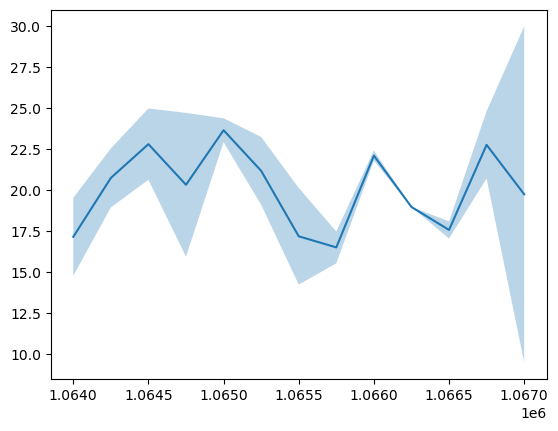

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
lower_bound = [M - Sigma for M, Sigma in zip(plotcov, Sigma_new_vec)]
upper_bound = [M + Sigma for M, Sigma in zip(plotcov, Sigma_new_vec)]
plt.plot(x_ax, plotcov)
plt.fill_between(x_ax, lower_bound, upper_bound, alpha=.3)


In [9]:
cov_pivot.describe()

,start,stop,cov_al1_1,cov_al3_1,cov_al4_1,mean_cov
count,9.180600e+04,9.180600e+04,91806.000000,91806.000000,91806.000000,91806.000000
mean,1.147562e+07,1.147587e+07,14.188258,13.751233,15.263095,14.400862
std,6.625563e+06,6.625563e+06,25.085207,27.729865,27.578938,26.175331
min,0.000000e+00,2.500000e+02,0.000000,0.000000,0.000000,0.000000
25%,5.737812e+06,5.738062e+06,0.096000,0.000000,0.028000,0.369333
50%,1.147562e+07,1.147588e+07,13.440000,12.760000,14.320000,14.166667
75%,1.721344e+07,1.721369e+07,21.640000,20.650000,23.460000,21.893333
max,2.295125e+07,2.295129e+07,2119.000000,2046.000000,2188.000000,2117.666667


In [18]:
acc_list = [ "al1_1","NT2_1_1"]


In [8]:
with open("acc_list.tmp", "w") as al:
    for i in acc_list:
        al.write(i)
        al.write("\n")
        #!grep scaffold_8[[:space:]] coverages/$i.depth.bed > $i.depth_chr8.tmp.bed
        
#!./scripts/get_chrfromded.sh

In [9]:
!./scripts/get_chrfromded.sh

OSError: [Errno 12] Cannot allocate memory

In [19]:
cov_pivot = ""
for i in acc_list:
    path = i + ".depth_chr8.tmp.bed"
    acc_bed = pd.read_csv(path, sep="\t", header = None)
    cov = "cov_" + i
    acc_bed = acc_bed.rename(columns={0: "chr", 1: "start", 2: "stop", 3: cov})
    if len(cov_pivot) == 0:
        cov_pivot = acc_bed
    else:
        cov_pivot = cov_pivot.merge(acc_bed.iloc[:, [1, 3]], on="start", how="outer")
#acc_bed.head()

In [20]:
cov_pivot["mean_cov"] = cov_pivot.iloc[:, 3:].mean(axis = 1)

In [25]:
cov_pivot.iloc[:, 3:-1]

,cov_al1_1,cov_NT2_1_1
0,17.91,25.08
1,12.15,27.81
2,19.88,26.93
3,23.82,21.02
4,21.68,19.56
...,...,...
91801,26.98,21.63
91802,27.84,23.95
91803,20.64,19.59
91804,20.56,22.34


In [27]:
plotcov = cov_pivot.mean_cov[(cov_pivot.start >= 14455832) & (cov_pivot.start <= 14459037)]
Sigma_new_vec = cov_pivot.stdev_cov[(cov_pivot.start >= 14455832) & (cov_pivot.start <= 14459037)]
x_ax = cov_pivot.start[(cov_pivot.start >= 14455832) & (cov_pivot.start <= 14459037)]

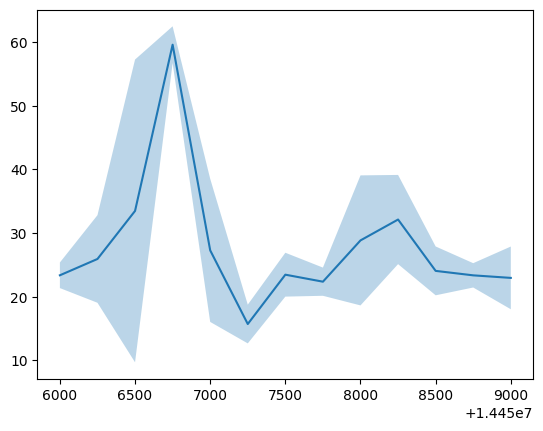

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
lower_bound = [M - Sigma for M, Sigma in zip(plotcov, Sigma_new_vec)]
upper_bound = [M + Sigma for M, Sigma in zip(plotcov, Sigma_new_vec)]
plt.plot(x_ax, plotcov)
plt.fill_between(x_ax, lower_bound, upper_bound, alpha=.3)


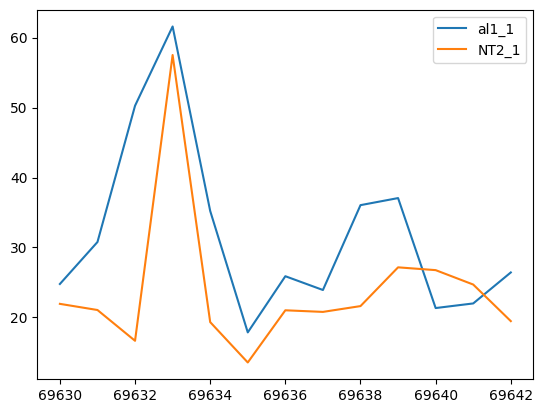

In [45]:
plt.plot(cov_pivot.cov_al1_1[(cov_pivot.start >= 14455832) & (cov_pivot.start <= 14459037)], label="al1_1")
plt.plot(cov_pivot.cov_NT2_1_1[(cov_pivot.start >= 14455832) & (cov_pivot.start <= 14459037)], label="NT2_1")
plt.legend()

In [33]:
cov_pivot

,chr,start,stop,cov_al1_1,cov_NT2_1_1,mean_cov,stdev_cov
0,scaffold_8,20000000,20000250,17.91,25.08,21.495,5.069956
1,scaffold_8,20000250,20000500,12.15,27.81,19.980,11.073292
2,scaffold_8,20000500,20000750,19.88,26.93,23.405,4.985103
3,scaffold_8,20000750,20001000,23.82,21.02,22.420,1.979899
4,scaffold_8,20001000,20001250,21.68,19.56,20.620,1.499066
...,...,...,...,...,...,...,...
91801,scaffold_8,19998750,19999000,26.98,21.63,24.305,3.783021
91802,scaffold_8,19999000,19999250,27.84,23.95,25.895,2.750645
91803,scaffold_8,19999250,19999500,20.64,19.59,20.115,0.742462
91804,scaffold_8,19999500,19999750,20.56,22.34,21.450,1.258650


In [ ]:
sns.lineplot(data=pib.smooth[(pib.index > 22616892) & (pib.index < 22622892)])
sns.scatterplot(x=[22619392], y=[0])